In [1]:
#Class Imbalance >>nOne class has higher Percentage
#Upsampling ,downsampling ,SMOTE

In [2]:
import numpy as np
import pandas as pd
np.random.seed(1) #For reproducibility

In [3]:
no_sample= 1000
class_0_ratio=0.9
no_class_0=int(no_sample * class_0_ratio)
no_class_1 =100

In [4]:
no_sample

1000

In [5]:
class_0_ratio

0.9

In [6]:
no_class_0

900

In [7]:
no_class_1

100

In [8]:
np.random.normal(0,1,no_class_0)

array([ 1.62434536e+00, -6.11756414e-01, -5.28171752e-01, -1.07296862e+00,
        8.65407629e-01, -2.30153870e+00,  1.74481176e+00, -7.61206901e-01,
        3.19039096e-01, -2.49370375e-01,  1.46210794e+00, -2.06014071e+00,
       -3.22417204e-01, -3.84054355e-01,  1.13376944e+00, -1.09989127e+00,
       -1.72428208e-01, -8.77858418e-01,  4.22137467e-02,  5.82815214e-01,
       -1.10061918e+00,  1.14472371e+00,  9.01590721e-01,  5.02494339e-01,
        9.00855949e-01, -6.83727859e-01, -1.22890226e-01, -9.35769434e-01,
       -2.67888080e-01,  5.30355467e-01, -6.91660752e-01, -3.96753527e-01,
       -6.87172700e-01, -8.45205641e-01, -6.71246131e-01, -1.26645989e-02,
       -1.11731035e+00,  2.34415698e-01,  1.65980218e+00,  7.42044161e-01,
       -1.91835552e-01, -8.87628964e-01, -7.47158294e-01,  1.69245460e+00,
        5.08077548e-02, -6.36995647e-01,  1.90915485e-01,  2.10025514e+00,
        1.20158952e-01,  6.17203110e-01,  3.00170320e-01, -3.52249846e-01,
       -1.14251820e+00, -

In [9]:
len(np.random.normal(0,1,no_class_0))

900

In [10]:
class_0 ={'feature1': np.random.normal(0,1,no_class_0),
 'feature2': np.random.normal(0,1,no_class_0),
 'target' : [0]*no_class_0
}

In [11]:
class_0=pd.DataFrame(class_0)

In [12]:
class_0

,feature1,feature2,target
0,-1.307971,-0.453503,0
1,1.472396,-0.820905,0
2,0.074876,0.940219,0
3,-1.786935,-1.411293,0
4,0.165211,0.884148,0
...,...,...,...
895,-1.322762,-1.140488,0
896,0.540306,0.501016,0
897,-0.507257,0.225767,0
898,1.128379,-1.089087,0


In [13]:
class_1 ={'feature1': np.random.normal(3,1,no_class_1),
 'feature2': np.random.normal(3,1,no_class_1),
 'target' : [1]*no_class_1
}

In [14]:
class_1=pd.DataFrame(class_1)

In [15]:
class_1

,feature1,feature2,target
0,2.901181,3.613719,1
1,2.729851,2.917747,1
2,4.745068,2.855780,1
3,2.819442,3.792378,1
4,2.797622,2.697728,1
...,...,...,...
95,2.247285,4.236735,1
96,4.360377,4.116299,1
97,3.386375,3.675240,1
98,3.388515,3.022452,1


In [16]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [17]:
df

,feature1,feature2,target
0,-1.307971,-0.453503,0
1,1.472396,-0.820905,0
2,0.074876,0.940219,0
3,-1.786935,-1.411293,0
4,0.165211,0.884148,0
...,...,...,...
995,2.247285,4.236735,1
996,4.360377,4.116299,1
997,3.386375,3.675240,1
998,3.388515,3.022452,1


In [18]:
df.target.value_counts(normalize=True)

0    0.9
1    0.1
Name: target, dtype: float64

In [19]:
df.minority=df[df.target ==1]
df.majority=df[df.target ==0]

C:\Users\shubh\AppData\Local\Temp\ipykernel_11464\3591196735.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.minority=df[df.target ==1]
C:\Users\shubh\AppData\Local\Temp\ipykernel_11464\3591196735.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.majority=df[df.target ==0]


In [20]:
df.minority

,feature1,feature2,target
900,2.901181,3.613719,1
901,2.729851,2.917747,1
902,4.745068,2.855780,1
903,2.819442,3.792378,1
904,2.797622,2.697728,1
...,...,...,...
995,2.247285,4.236735,1
996,4.360377,4.116299,1
997,3.386375,3.675240,1
998,3.388515,3.022452,1


In [21]:
df.majority

,feature1,feature2,target
0,-1.307971,-0.453503,0
1,1.472396,-0.820905,0
2,0.074876,0.940219,0
3,-1.786935,-1.411293,0
4,0.165211,0.884148,0
...,...,...,...
895,-1.322762,-1.140488,0
896,0.540306,0.501016,0
897,-0.507257,0.225767,0
898,1.128379,-1.089087,0


In [22]:
#UPsampling>>> Increase the minority data to majority data 

In [23]:
from sklearn.utils import resample

In [24]:
df_minority_upsampled = resample(df.minority,replace =True ,n_samples = len(df.majority),random_state=1)

In [25]:
df_minority_upsampled

,feature1,feature2,target
937,1.357980,1.436963,1
912,3.031925,4.110404,1
972,1.820175,4.590844,1
909,2.810210,2.061396,1
975,2.339504,3.891213,1
...,...,...,...
936,4.228505,3.963701,1
998,3.388515,3.022452,1
901,2.729851,2.917747,1
932,3.855587,3.597946,1


In [26]:
df_minority_upsampled.shape

(900, 3)

In [27]:
df_minority_upsampled.head()

,feature1,feature2,target
937,1.357980,1.436963,1
912,3.031925,4.110404,1
972,1.820175,4.590844,1
909,2.810210,2.061396,1
975,2.339504,3.891213,1


In [28]:
df_minority_upsampled.tail()

,feature1,feature2,target
936,4.228505,3.963701,1
998,3.388515,3.022452,1
901,2.729851,2.917747,1
932,3.855587,3.597946,1
930,2.120736,3.320536,1


In [29]:
df_minority_upsampled[:120]

,feature1,feature2,target
937,1.357980,1.436963,1
912,3.031925,4.110404,1
972,1.820175,4.590844,1
909,2.810210,2.061396,1
975,2.339504,3.891213,1
...,...,...,...
976,3.372111,2.279053,1
943,2.342917,3.207295,1
920,2.119955,1.701817,1
930,2.120736,3.320536,1


In [30]:
df_minority_upsampled.duplicated()

937    False
912    False
972    False
909    False
975    False
       ...  
936     True
998     True
901     True
932     True
930     True
Length: 900, dtype: bool

In [31]:
df_minority_upsampled.duplicated().sum()

800

In [32]:
df_upsampled = pd.concat([df.majority, df_minority_upsampled])

In [33]:
df_upsampled

,feature1,feature2,target
0,-1.307971,-0.453503,0
1,1.472396,-0.820905,0
2,0.074876,0.940219,0
3,-1.786935,-1.411293,0
4,0.165211,0.884148,0
...,...,...,...
936,4.228505,3.963701,1
998,3.388515,3.022452,1
901,2.729851,2.917747,1
932,3.855587,3.597946,1


In [34]:
df_upsampled.shape

(1800, 3)

In [35]:
df_upsampled.value_counts()

feature1   feature2   target
 3.855587   3.597946  1         18
 4.360377   4.116299  1         17
 3.475760   3.640464  1         15
 4.592668   3.427123  1         15
 2.977987   3.622981  1         14
                                ..
-0.326866   0.500320  0          1
-0.324742   0.610146  0          1
-0.324332  -1.317582  0          1
-0.321148   1.254849  0          1
 0.120250  -1.199396  0          1
Length: 1000, dtype: int64

In [36]:
df_upsampled.target.value_counts()

0    900
1    900
Name: target, dtype: int64

In [37]:
 #Downsampling

In [38]:
df.minority

,feature1,feature2,target
900,2.901181,3.613719,1
901,2.729851,2.917747,1
902,4.745068,2.855780,1
903,2.819442,3.792378,1
904,2.797622,2.697728,1
...,...,...,...
995,2.247285,4.236735,1
996,4.360377,4.116299,1
997,3.386375,3.675240,1
998,3.388515,3.022452,1


In [39]:
df_majority_downsampled= resample(df.majority,replace=True ,n_samples=len(df.minority),random_state=0)

In [40]:
df_majority_downsampled

,feature1,feature2,target
684,-0.563622,1.709208,0
559,-1.271168,1.667778,0
629,-0.191777,0.680508,0
192,-0.472876,0.495138,0
835,-1.131271,-0.804692,0
...,...,...,...
639,0.983639,-0.003193,0
131,0.147602,1.208443,0
868,-0.278681,0.160347,0
180,-0.131706,0.011318,0


In [41]:
df_downsampled =pd.concat([df.minority ,df_majority_downsampled])

In [42]:
df_downsampled

,feature1,feature2,target
900,2.901181,3.613719,1
901,2.729851,2.917747,1
902,4.745068,2.855780,1
903,2.819442,3.792378,1
904,2.797622,2.697728,1
...,...,...,...
639,0.983639,-0.003193,0
131,0.147602,1.208443,0
868,-0.278681,0.160347,0
180,-0.131706,0.011318,0


In [43]:
df_downsampled.shape

(200, 3)

In [44]:
#SMOTE >>> Synthetic minority oversampling technique

In [45]:
from sklearn.datasets import make_classification

In [46]:
x,y=make_classification(n_samples=1000 , n_redundant =0 , n_features=2 ,n_clusters_per_class=1, weights=[0.90],random_state=1)

In [47]:
x

array([[ 1.53682958, -1.39869399],
       [ 1.55110839,  1.81032905],
       [ 1.29361936,  1.01094607],
       ...,
       [-0.55662536, -0.15983725],
       [ 1.00499902,  0.93628981],
       [ 1.46210987,  1.14497791]])

In [48]:
y

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [49]:
x.shape

(1000, 2)

In [50]:
len(x)

1000

In [51]:
len(y[y==0])

894

In [52]:
len(y[y==1])

106

In [53]:
y.shape

(1000,)

In [54]:
df1= pd.DataFrame(x,columns=['f1','f2'])
df2 =pd.DataFrame(y,columns = ['target'])
df_final=pd.concat([df1 ,df2],axis=1)

In [55]:
df_final

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
995,2.210439,2.006772,0
996,1.910941,2.011860,0
997,-0.556625,-0.159837,0
998,1.004999,0.936290,0


In [56]:
df_final.target.value_counts()

0    894
1    106
Name: target, dtype: int64

In [57]:
import matplotlib.pyplot as plt

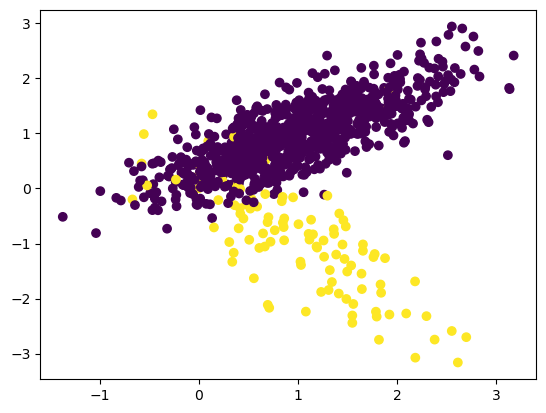

In [58]:
plt.scatter(df_final['f1'],df_final['f2'],c=df_final['target'])

In [65]:
pip install imblearn


     -------------------------------------- 258.3/258.3 kB 1.6 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
oversample =SMOTE()

In [68]:
x,y = oversample.fit_resample(df_final[['f1','f2']],df_final['target'])

In [69]:
x

,f1,f2
0,1.536830,-1.398694
1,1.551108,1.810329
2,1.293619,1.010946
3,1.119889,1.632518
4,1.042356,1.121529
...,...,...
1783,-0.543144,0.192375
1784,1.390330,-0.690732
1785,0.590286,-0.072709
1786,0.426450,0.125546


In [70]:
y

0       1
1       0
2       0
3       0
4       0
       ..
1783    1
1784    1
1785    1
1786    1
1787    1
Name: target, Length: 1788, dtype: int32

In [71]:
x.shape

(1788, 2)

In [72]:
y.shape

(1788,)

In [73]:
len(y[y==0])

894

In [74]:
len(y[y==1])

894

In [75]:
x

,f1,f2
0,1.536830,-1.398694
1,1.551108,1.810329
2,1.293619,1.010946
3,1.119889,1.632518
4,1.042356,1.121529
...,...,...
1783,-0.543144,0.192375
1784,1.390330,-0.690732
1785,0.590286,-0.072709
1786,0.426450,0.125546


In [76]:
df1= pd.DataFrame(x,columns=['f1','f2'])
df2 =pd.DataFrame(y,columns = ['target'])
df_oversampled=pd.concat([df1 ,df2],axis=1)

In [77]:
df_oversampled

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
1783,-0.543144,0.192375,1
1784,1.390330,-0.690732,1
1785,0.590286,-0.072709,1
1786,0.426450,0.125546,1


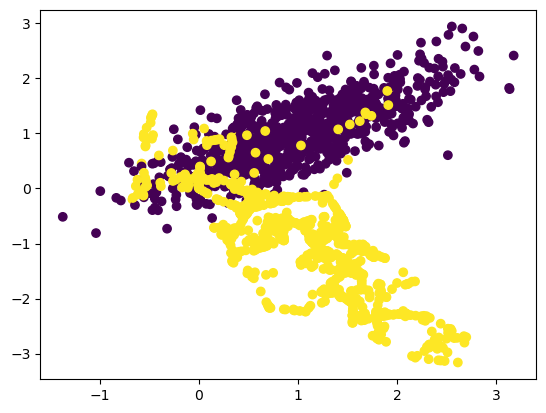

In [78]:
plt.scatter(df_oversampled['f1'],df_oversampled['f2'],c=df_oversampled['target'])